In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('encoded_car_data (1).csv')
df.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [3]:
x=df[['enginesize','horsepower','citympg','highwaympg']]
y=df['price']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
lr=Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
lr.fit(x_train, y_train)
y_pred_linear=lr.predict(x_test)

In [6]:
poly_model=Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
    
])
poly_model.fit(x_train, y_train)
y_pred_poly=poly_model.predict(x_test)

In [7]:
print('Name: VIJAYAPRATHISHA J')
print('Reg.No: 212225240184')
print("Linear Regression")
print('MSE=',mean_squared_error(y_test,y_pred_linear))
print('MAE=',mean_absolute_error(y_test,y_pred_linear))
r2score=r2_score(y_test,y_pred_linear)
print('R2 Score=',r2score)

Name: VIJAYAPRATHISHA J
Reg.No: 212225240184
Linear Regression
MSE= 16471505.900042146
MAE= 2892.628134137953
R2 Score= 0.7913520781370976


In [8]:
print("\nPolynomial Regression:")
print(f"MSE: {mean_squared_error(y_test,y_pred_poly):.2f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_poly):.2f}")
print(f"R²: {r2_score(y_test, y_pred_poly):.2f}")


Polynomial Regression:
MSE: 15247661.89
MAE: 2694.05
R²: 0.81


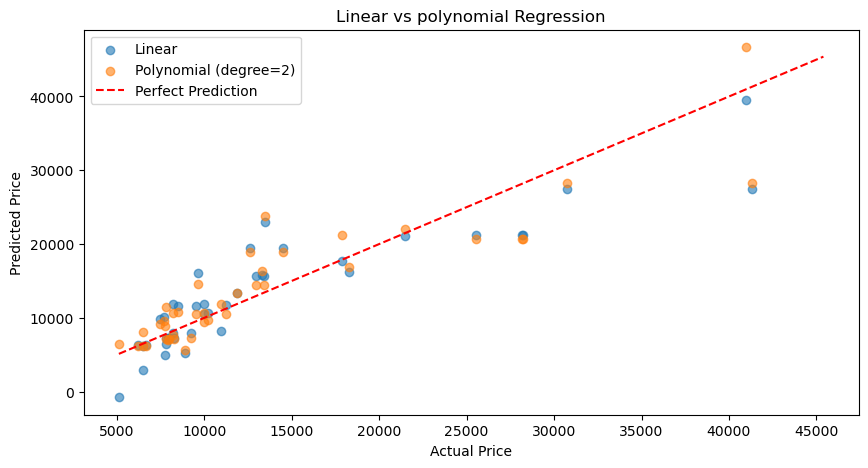

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_linear, label='Linear', alpha=0.6)
plt.scatter(y_test,y_pred_poly, label='Polynomial (degree=2)',alpha=0.6)
plt.plot([y.min(),y.max()], [y.min(),y.max()], 'r--',label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear vs polynomial Regression")
plt.legend()
plt.show()